## 简介
-----------------------------
此数据集分析的是人力资源问题，数据集的数据包含了雇员对工作的满意程度、雇员自身的评价、完成的项目数、每月平均工作小时数量、在公司的年限、是否出过工伤事故、是否离职、是否升职、职位以及薪水水平这几个信息。

人力资源本不是我的业务知识范围内，所以这里做分析主要是为了学习可视化，同时按自己的理解去探索数据集。下面开始这趟探索之旅。

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(style="white",color_codes=True)
%matplotlib inline
Employee=pd.read_csv("HR_comma_sep.csv")
Employee.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
Employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


分析人力资源，自然先探索会是什么原因导致员工离职？

从压力这个角度来看，这里选择satisfaction_level、number_project、average_montly_hours、salary这四个字段来看看。
salary这个是字符型字段，这里就先进行数字编码，然后再统计。

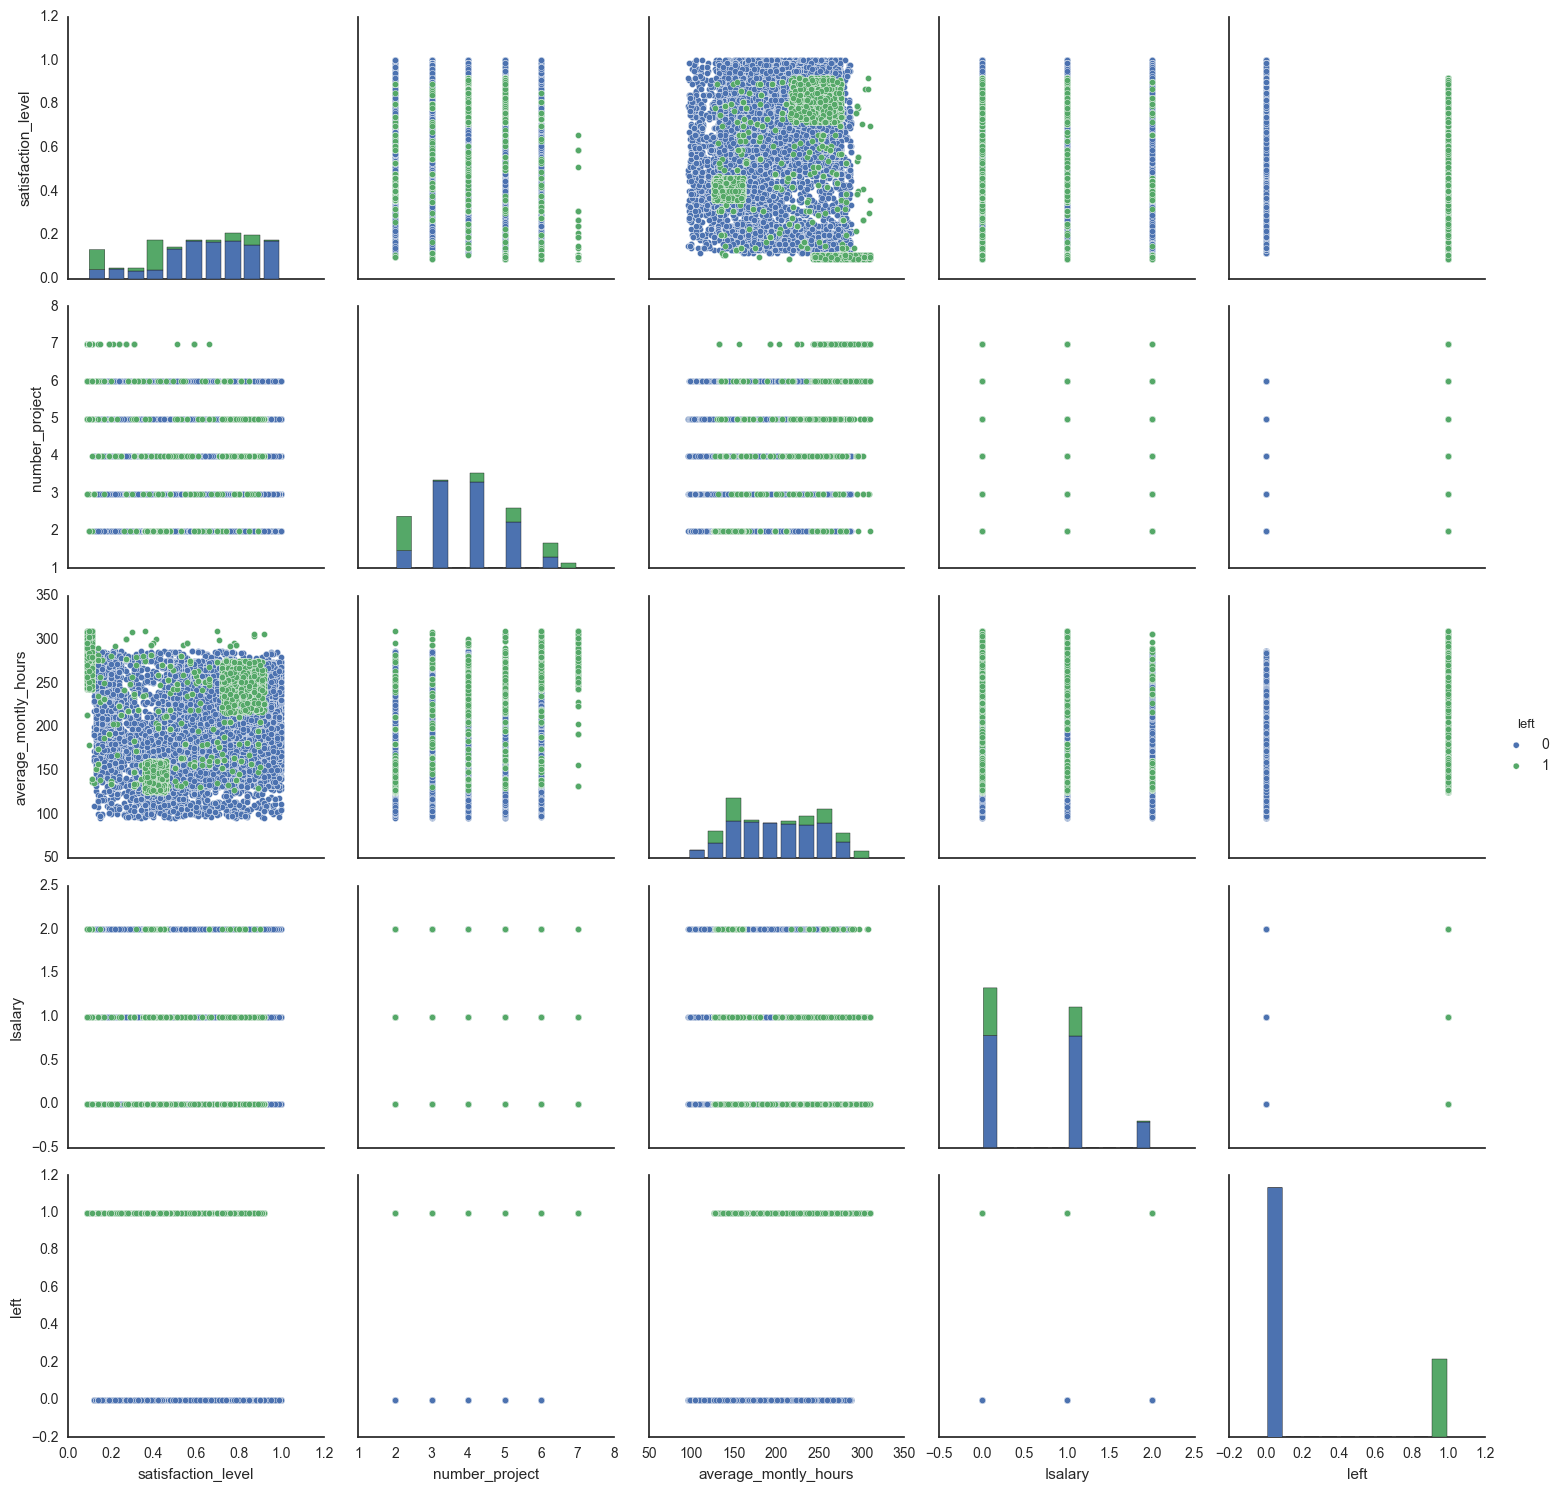

In [24]:
def salaryCode(x):
    if x=="low":
        return 0
    elif x=="medium":
        return 1
    else:
        return 2
#对salary数字编码
Employee["Isalary"]=Employee.salary.map(lambda x:salaryCode(x))
data=Employee[["satisfaction_level","number_project","average_montly_hours","Isalary","left"]]
sns.pairplot(data,hue="left",size=3)

额，这是什么东西。。。失败了。。
还是先老老实实看看各个特征之间的相关度看看。


In [25]:
Employee.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Isalary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
Isalary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


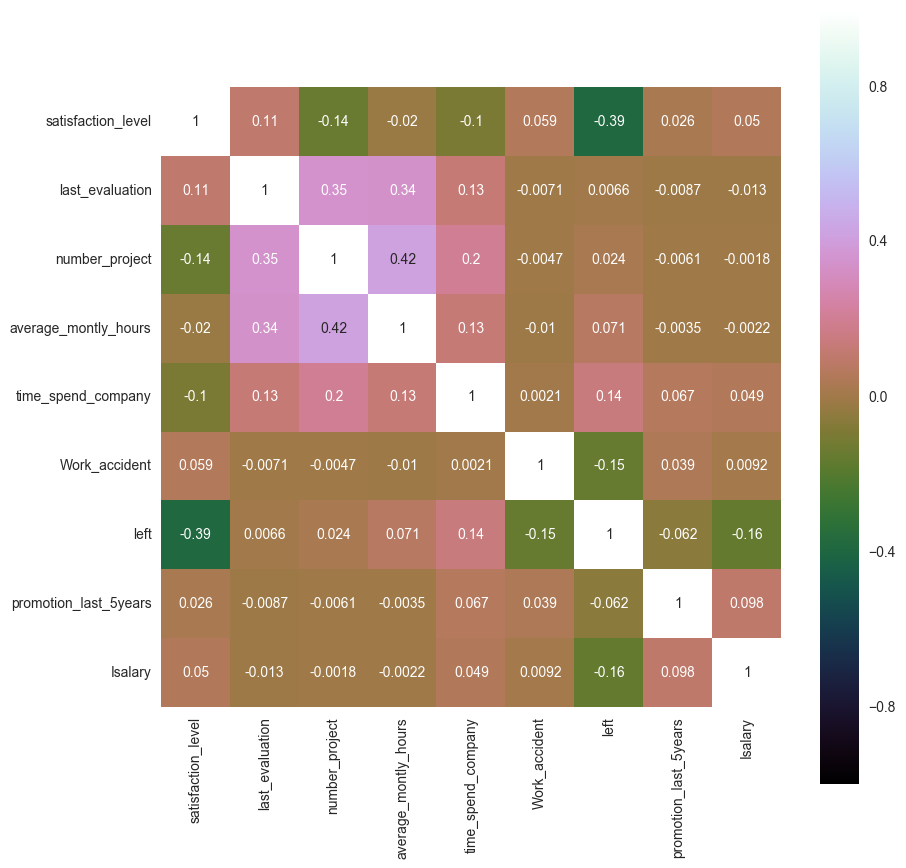

In [28]:
#可视化看看
correlation=Employee.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

相关度度量了两个特征之间的关系，相关系数的正负表示了是正相关还是负相关，正相关表示当一个特征值增加，另一个也增加，负相关则相反，其值则衡量了增长程度。

根据以上的值，基本上跟常识是相符合的，满意度与是否离职是负相关、薪水与满意度成正比等等，但是，也有些奇怪的，工伤事故与满意度呈正相关是什么意思？升职与月平均工作时间原来是负相关，恩，这很有教育意义。

可见，这个相关系数在一定量的数据集下还是有点不太靠谱。

接着看看职业这个维度。

In [29]:
#先看看有哪些职业
Employee.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [46]:
#接着分别看看他们的薪水与离职关系
Employee.pivot_table(values=["left"],index=["sales","salary"],aggfunc=np.mean)

left
sales       salary          
IT          high    0.048193
            low     0.282430
            medium  0.181308
RandD       high    0.078431
            low     0.151099
            medium  0.166667
accounting  high    0.067568
            low     0.276536
            medium  0.298507
hr          high    0.133333
            low     0.274627
            medium  0.325905
management  high    0.004444
            low     0.327778
            medium  0.137778
marketing   high    0.112500
            low     0.313433
            medium  0.180851
product_mng high    0.088235
            low     0.232816
            medium  0.227154
sales       high    0.052045
            low     0.332063
            medium  0.170993
support     high    0.056738
            low     0.339442
            medium  0.167728
technical   high    0.124378
            low     0.275510
            medium  0.256321